# KD-Tree and Ball Tree (Nearest Neighbor Structures)

## KD-Tree

### Build Algorithm
- Recursively partition space with **axis-aligned hyperplanes**.
- Axis choice:
  - **Round-robin**: `axis = depth mod d`
  - **Variance-based**: pick axis with max variance
- Split point: **median** along chosen axis → balanced tree of depth ~ `O(log n)`

### Query Algorithm
1. **Descend** to leaf containing query point.
2. Compute distances to leaf points; track `d_best` (worst of k nearest).
3. **Backtrack up**:
   - At each split, check if query’s **k-ball** (radius = `d_best`) crosses hyperplane:
     - Distance to hyperplane ≤ `d_best` ⇒ must search sibling
     - Distance to hyperplane > `d_best` ⇒ prune sibling
4. Continue to root.

### Complexity
- Expected (low dimension): `O((log n + k)·d)`
- Worst-case: `O(n·d)`
- High dimension: performance degrades toward brute force.

---

## Ball Tree

### Build Algorithm
- Each node = a **ball** (center + radius) covering a subset.
- Split procedure (common heuristic):
  1. Pick two far-apart points (farthest pair, double sweep, or k-means(2)).
  2. Assign each remaining point to nearest seed.
  3. Enclose subsets in new balls.

### Query Algorithm
- Descend into child ball whose center is closer to query.
- At each sibling, use triangle inequality:
  - If `dist(query, c) - r > d_best`, prune entire ball.
- Otherwise, explore.

### Complexity
- Expected: `O((log n + k)·d)`
- Worst-case: `O(n·d)`
- Handles diagonal/curved clusters better because balls fit geometry, not axes.

---

## Example: Diagonal Clusters

Points:
- Cluster A: (1,1), (2,2), (3,3), (4,4)
- Cluster B: (7,9), (8,10), (9,11), (10,12)
- Query: (5,6)

**KD-Tree root split:** vertical line at median x.
- Query ball (radius ≈ 2.2) crosses the split ⇒ must search both sides.

**Ball Tree root balls:** one ball per cluster.
- `dist(q,c_R) - r_R ≈ 3.6 > d_best ≈ 2.2` ⇒ prune entire right cluster.
- Result: only need to search left cluster.

---

## KD vs Ball Summary

| Aspect                | KD-Tree                          | Ball Tree                        |
|-----------------------|----------------------------------|----------------------------------|
| Split type            | Axis-aligned hyperplane          | Hypersphere (center + radius)    |
| Axis choice           | Round-robin / max variance       | None (pick far seeds)            |
| Region shape          | Rectangles (boxes)               | Balls (spheres)                  |
| Pruning test          | Distance to hyperplane           | Triangle inequality              |
| Strengths             | Low-d, axis-aligned data         | Skewed/diagonal clusters, moderate d |
| Weakness              | Poor in high-d, diagonal clusters| More costly to build, overlapping balls |

---


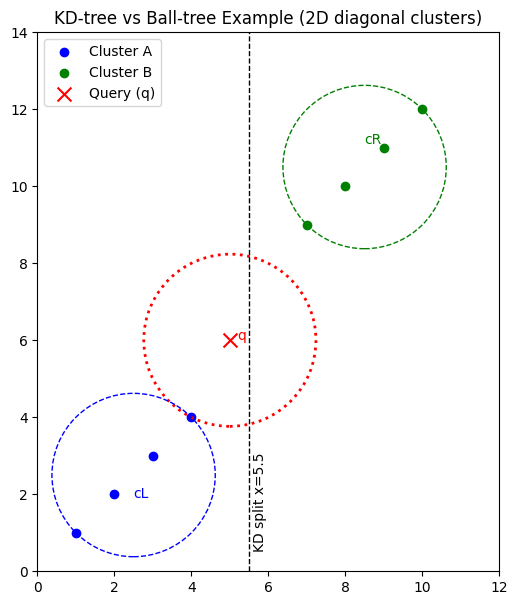

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example dataset
A = np.array([[1,1],[2,2],[3,3],[4,4]])
B = np.array([[7,9],[8,10],[9,11],[10,12]])
X = np.vstack([A,B])
q = np.array([5,6])  # query point

# Ball Tree centers and radii (approximate)
cL = A.mean(axis=0)
rL = np.max(np.linalg.norm(A - cL, axis=1))
cR = B.mean(axis=0)
rR = np.max(np.linalg.norm(B - cR, axis=1))

# Best neighbor from A (for query ball)
d_best = np.linalg.norm(q - np.array([4,4]))

# KD-tree root split: median on x
x_median = np.median(X[:,0])

# --- Plot ---
fig, ax = plt.subplots(figsize=(7,7))

# Points and query
ax.scatter(A[:,0], A[:,1], c='blue', label="Cluster A")
ax.scatter(B[:,0], B[:,1], c='green', label="Cluster B")
ax.scatter(q[0], q[1], c='red', marker='x', s=100, label="Query (q)")

# KD split line
ax.axvline(x=x_median, color='black', linestyle='--', linewidth=1)
ax.text(x_median+0.1, 0.5, f"KD split x={x_median:.1f}", rotation=90, va='bottom')

# Query ball
circleQ = plt.Circle(q, d_best, color='red', fill=False, linestyle=':', linewidth=2)
ax.add_patch(circleQ)

# Ball Tree balls
circleL = plt.Circle(cL, rL, color='blue', fill=False, linestyle='--')
circleR = plt.Circle(cR, rR, color='green', fill=False, linestyle='--')
ax.add_patch(circleL)
ax.add_patch(circleR)

# Labels
ax.text(cL[0], cL[1]-0.6, "cL", color='blue')
ax.text(cR[0], cR[1]+0.6, "cR", color='green')
ax.text(q[0]+0.2, q[1], "q", color='red')

ax.set_xlim(0,12)
ax.set_ylim(0,14)
ax.set_aspect('equal')
ax.legend()
ax.set_title("KD-tree vs Ball-tree Example (2D diagonal clusters)")
plt.show()
